In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 读取数据
csv_file = "/content/churn.csv"
data = pd.read_csv(csv_file)
drop = ['RowNumber','CustomerId','Surname','Exited']
newdata=data.drop(drop, axis=1)

In [152]:
newdata

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [153]:
#newdata.iloc[:,:] = newdata.iloc[:,:].apply(lambda a: round((a-a.min()) / (a.max() - a.min()), 4), axis=0)

from sklearn.preprocessing import MinMaxScaler
data_encoded = pd.get_dummies(newdata)
df_clust = data_encoded.copy()


scaler = MinMaxScaler()
data_encoded2 = pd.DataFrame(scaler.fit_transform(data_encoded), columns=data_encoded.columns)


In [154]:
data_encoded2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,1.0,0.0,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,1.0,0.0,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,0.0,0.0,1.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,0.0,1.0,0.0,0.0,1.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

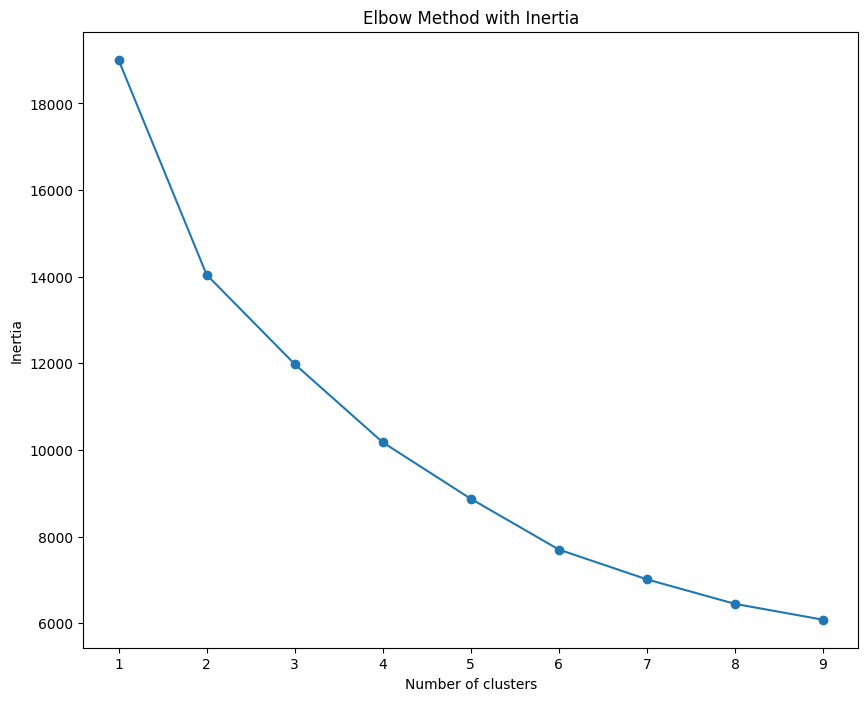

In [155]:
inertias = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_encoded2)
  inertias.append(kmeans.inertia_)
  
## plot Elbow Method  
plt.figure(1, figsize=(10,8))
plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow Method with Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

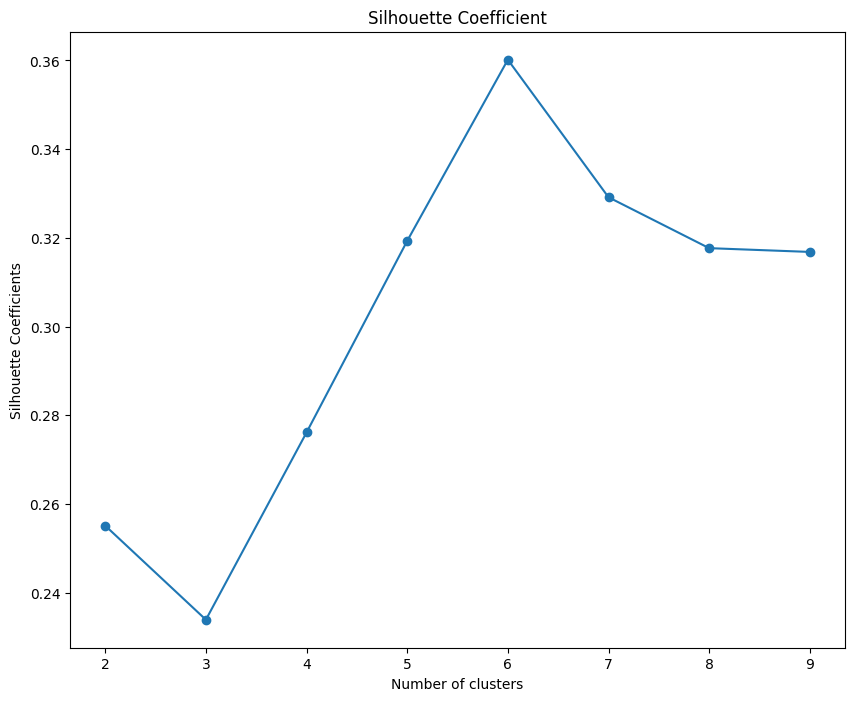

In [156]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_encoded2)
  score = silhouette_score(data_encoded2, kmeans.labels_)
  silhouette_coefficients.append(score)

### check exact cluster#
plt.figure(1, figsize=(10,8))
plt.plot(range(2,10), silhouette_coefficients, marker='o')
plt.title('Silhouette Coefficient')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficients')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


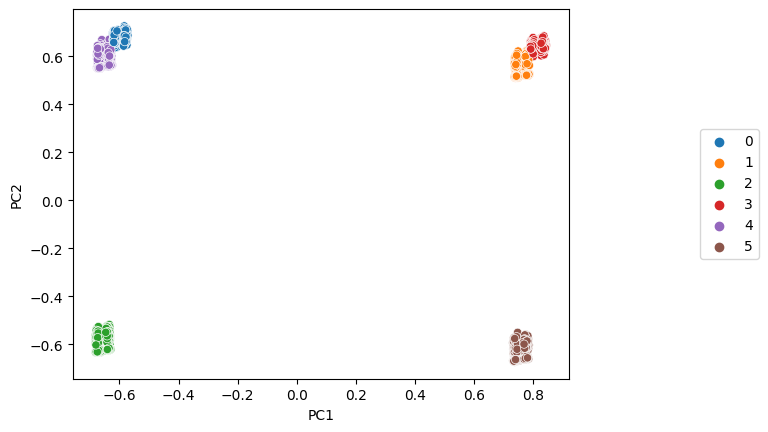

In [158]:
import seaborn as sns

data_with_clusters=data_encoded2.copy()
kmeans_6 = KMeans(n_clusters=6, random_state=0).fit(data_with_clusters)
pca = PCA(2)
pca_data4 = pd.DataFrame(pca.fit_transform(data_with_clusters),columns=['PC1','PC2']) 
pca_data4['cluster'] = pd.Categorical(kmeans_6.labels_)
cluster_fig = sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data4)
cluster_fig.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [159]:
cluster_labels = kmeans_6.labels_
data['cluster'] = cluster_labels

In [160]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,cluster
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,5
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,5
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,2
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,2
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,5
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0


In [161]:

drop = ['RowNumber','CustomerId','Surname']
cluster_data=data.drop(drop, axis=1)
grouped_data=cluster_data.groupby('cluster')
means = grouped_data.mean()

<ipython-input-161-74250ea84ea3>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = grouped_data.mean()


In [162]:
median = grouped_data.median()

<ipython-input-162-749f72d71184>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = grouped_data.median()


In [165]:
means

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
cluster,,,,,,,,,
0,649.966565,39.424772,5.050152,120259.668222,1.527356,0.720365,0.523556,99905.033959,0.278116
1,651.769513,39.199265,5.000000,59862.092534,1.573003,0.707989,0.516988,100734.107475,0.212121
2,650.064657,38.296404,5.049401,63546.284875,1.517254,0.713767,0.519070,100174.252495,0.127134
3,653.093881,40.154233,4.965633,119145.966471,1.511316,0.706622,0.468567,102446.424124,0.375524
4,650.992075,38.649135,5.057637,63352.833746,1.512968,0.684438,0.539625,98425.687680,0.131124
5,649.185759,38.773994,4.950022,60322.670159,1.547545,0.697921,0.513932,99564.252755,0.203450


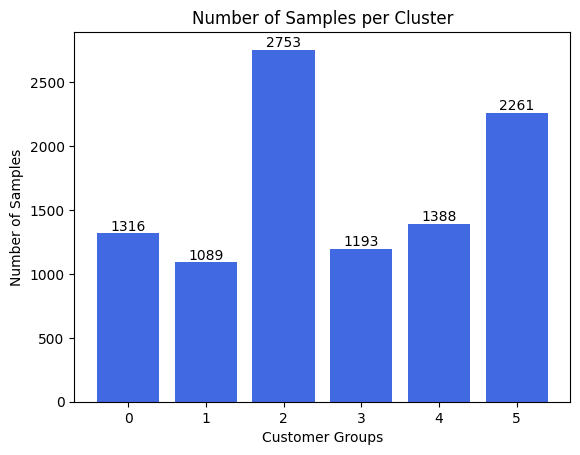

In [176]:
group_counts = data['cluster'].value_counts()


plt.bar(group_counts.index, group_counts.values)

 
bars = plt.bar(group_counts.index, group_counts.values,color='royalblue')

plt.title("Number of Samples per Cluster")
plt.xlabel("Customer Groups")
plt.ylabel("Number of Samples")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')
plt.show()